In [ ]:
# Movie Recommentation System - INFO 6105 - Final Project

In [ ]:
#Importing all the required packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer
from wordcloud import WordCloud, STOPWORDS
import scipy
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from scipy.sparse import csr_matrix
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib
# for interactive inline plots
#%matplotlib notebook  
# for simple inline plots
%matplotlib inline 
import time, math
import re
import warnings
from surprise import SVD
from surprise import accuracy
from surprise import Dataset
from surprise.model_selection import cross_validate
from sklearn.model_selection import KFold
from surprise import Dataset
from surprise import Reader
from sklearn.metrics.pairwise import linear_kernel
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# getting all the required file paths stored in a folder

for dirname, _, filenames in os.walk('C:/Users/anjal/Desktop/Validation/Project Python/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/anjal/Desktop/Validation/Project Python/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f336f686877444d433138374a714c363944472f67697068792e676966.gif
C:/Users/anjal/Desktop/Validation/Project Python/genome_scores.csv
C:/Users/anjal/Desktop/Validation/Project Python/genome_tags.csv
C:/Users/anjal/Desktop/Validation/Project Python/link.csv
C:/Users/anjal/Desktop/Validation/Project Python/movie.csv
C:/Users/anjal/Desktop/Validation/Project Python/rating.csv
C:/Users/anjal/Desktop/Validation/Project Python/tag.csv


In [4]:
# Loading the dataset
movie=pd.read_csv('C:/Users/anjal/Desktop/Validation/Project Python/movie.csv')
rating=pd.read_csv('C:/Users/anjal/Desktop/Validation/Project Python/rating.csv')
scores=pd.read_csv('C:/Users/anjal/Desktop/Validation/Project Python/genome_scores.csv')
genome_tags=pd.read_csv('C:/Users/anjal/Desktop/Validation/Project Python/genome_tags.csv')
links=pd.read_csv('C:/Users/anjal/Desktop/Validation/Project Python/link.csv')
tags=pd.read_csv('C:/Users/anjal/Desktop/Validation/Project Python/tag.csv')

In [5]:
# Analysing the dataset
print('The size of movie.csv file is:',movie.shape, "and the features are:",movie.columns)
print('The size of rating.csv file is:',rating.shape, "and the features are:",rating.columns)
print('The size of genome_scores.csv file is:',scores.shape, "and the features are:",scores.columns)
print('The size of genome_tags file is:',genome_tags.shape, "and the features are:",genome_tags.columns)
print('The size of link.csv file is:',links.shape, "and the features are:",links.columns)
print('The size of tag.csv file is:',tags.shape, "and the features are:",tags.columns)

The size of movie.csv file is: (27278, 3) and the features are: Index(['movieId', 'title', 'genres'], dtype='object')
The size of rating.csv file is: (20000263, 4) and the features are: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
The size of genome_scores.csv file is: (11709768, 3) and the features are: Index(['movieId', 'tagId', 'relevance'], dtype='object')
The size of genome_tags file is: (1128, 2) and the features are: Index(['tagId', 'tag'], dtype='object')
The size of link.csv file is: (27278, 3) and the features are: Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
The size of tag.csv file is: (465564, 4) and the features are: Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


In [6]:
# Exploring the dataset 

In [7]:
#Identifying the unique movies from the given dataset to avoid redundency
movie.info()
movies = movie['movieId'].unique().tolist()
print('\nThe number of unique movies in the list :',len(movies))
movie.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB

The number of unique movies in the list : 27278


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
# finding out the minimum and maximum ratings given movie using .min() and .max() functions
rating.info()
rating.describe()
print('\nThe minimum rating given to a movie:',rating['rating'].min(),' and the maximum rating given to a movie:',rating['rating'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB

The minimum rating given to a movie: 0.5  and the maximum rating given to a movie: 5.0


In [8]:

#information about the genome_scores
genome_scores_information=scores.info()
print('\n')

#information about the genome_tags
genome_tags_information=genome_tags.info()
print('\n')

#information about link
link_information=links.info()
print('\n')

#informatin about tags
tag_information=tags.info()
print('\n')

#informatin about movie
movies_information=movie.info()
print('\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27278 non-null  int64  
 1   imdbId   27278 non-null  int64  
 2   tmdbId   27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 

In [9]:
# Cleaning the dataset - count number of null values by checking the null values present in the dataset
print('For genome scores:',np.count_nonzero(scores.isnull().values))
print('For genome tags',np.count_nonzero(genome_tags.isnull().values))
print('For links:',np.count_nonzero(links.isnull().values))
print('For movie:',np.count_nonzero(movie.isnull().values))
print('For rating:',np.count_nonzero(rating.isnull().values))
print('For tags:',np.count_nonzero(tags.isnull().values))

For genome scores: 0
For genome tags 0
For links: 252
For movie: 0
For rating: 0
For tags: 16


In [10]:
#dropping all the null values using .dropna() function and checking if there are any after removing
links=links.dropna()
links.isnull().any()
print('For links:',np.count_nonzero(links.isnull().values))

For links: 0


In [11]:
tags=tags.dropna()
tags.isnull().any()
print('For tags:',np.count_nonzero(tags.isnull().values))

For tags: 0


In [12]:
#viewing a few results from the imported csv files
#1. results from genome_scores.csv
genome_score_head = scores.head(5)
print('For genome scores:\n',genome_score_head)
print('\n')

#2 results from genome_tags.csv
genome_tags_head = genome_tags.head(5)
print('For genome tags\n',genome_tags_head)
print('\n')

#3 results from link.csv
link_head = links.head(5)
print(link_head)
print('\n')

#4 results from movie.csv
movie_head = movie.head(5)
print('For movies\n',movie_head)
print('\n')

#5 results from rating.csv
rating_head = rating.head(5)
print('For ratings\n',rating_head)
print('\n')

#6 results from tag.csv
tag_head = tags.head(5)
print('Fortags',tag_head)
print('\n')

For genome scores:
    movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675


For genome tags
    tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s


   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


For movies
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                

In [16]:
#Reading the dataset rating.csv

In [13]:
n_ratings = len(rating)               #print total number of ratings we got from the dataset (i.e. the number of users who rated)

n_movies = rating['movieId'].nunique() #print total movies that have unique ID

n_users = rating['userId'].nunique()  #print total unique user ID

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 20000263
Number of unique movieId's: 26744
Number of unique users: 138493
Average number of ratings per user: 144.41
Average number of ratings per movie: 747.84


In [14]:
#The number of ratings given by each unique user.
user_freq = rating[['userId', 'movieId']].groupby('userId').count().reset_index() 
user_freq.columns = ['userId', 'n_ratings']
user_freq.head()


,userId,n_ratings
0,1,175
1,2,61
2,3,187
3,4,28
4,5,66


In [15]:
#maximum rating given by a customer
print(user_freq.max())

userId       138493
n_ratings      9254
dtype: int64


In [16]:
# Data Vizulatization on the movie title
movie['title'] = movie['title'].astype('str')

In [17]:
title_corpus = ' '.join(movie['title'])

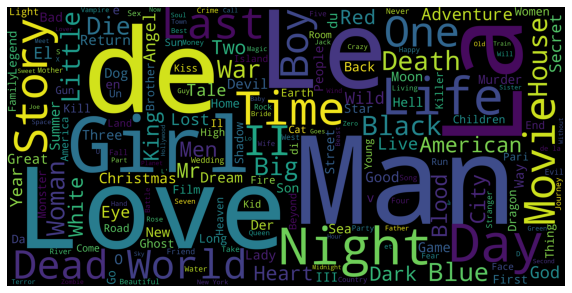

In [22]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(10,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [23]:
# From the above figure we can see the most commonly occuring words in the movie title. The words Man,Love and Girl are the most used words in movie titles.

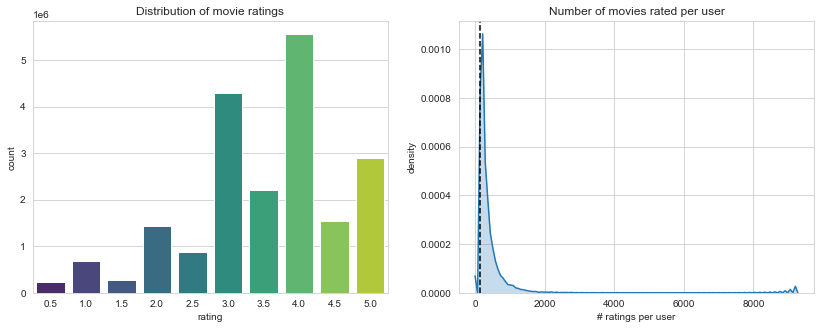

In [24]:
#plotting graphs for the distribution of movie ratings and number of movies rated per user

sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="rating", data=rating, palette="viridis")
plt.title("Distribution of movie ratings")

plt.subplot(1,2,2)
ax = sns.kdeplot(user_freq['n_ratings'], shade=True, legend=False)
plt.axvline(user_freq['n_ratings'].mean(), color="k", linestyle="--")
plt.xlabel("# ratings per user")
plt.ylabel("density")
plt.title("Number of movies rated per user")
plt.show()

In [25]:
#Function to count the number of times a genre has appeared.
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [26]:
labels = set()
for s in movie['genres'].str.split('|').values:
    labels = labels.union(set(s))

In [27]:
keyword_occurences, dum = count_word(movie, 'genres', labels)
keyword_occurences[:5]

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520]]

In [28]:
#The top 5 genres are, in that respect order: Drama, Comedy, Thriller, Romance, and Action. 

In [29]:
words = dict()
trunc_occurences = keyword_occurences[0:50]

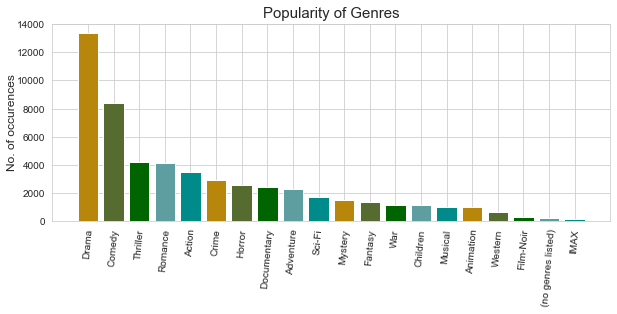

In [30]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(10,8))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 12, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color=['darkgoldenrod', 'darkolivegreen', 'darkgreen', 'cadetblue', 'darkcyan'])
plt.title("Popularity of Genres",fontsize = 15)
plt.show()


In [31]:
# movie and rating are merge for analysis
movie_details=movie.merge(rating,on='movieId')

In [32]:
movie_details.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41


In [33]:
# timestamp column is dropeed as it is not required for the further content based recommendation
movie_details.drop(columns=['timestamp'],inplace=True)

In [34]:
movie_details.shape

(20000263, 5)

In [35]:
# Grouping the rating based on user
ratings_user = movie_details.groupby('userId').agg([np.size, np.mean])

In [36]:
ratings_user.head()

movieId              rating          
          size         mean   size      mean
userId                                      
1          175  3428.537143  175.0  3.742857
2           61  2098.524590   61.0  4.000000
3          187  1698.331551  187.0  4.122995
4           28   394.964286   28.0  3.571429
5           66   574.484848   66.0  4.272727

In [37]:
ratings_user.max()

movieId  size      9254.000000
         mean    101447.615385
rating   size      9254.000000
         mean         5.000000
dtype: float64

Text(0, 0.5, 'No. of ratings')

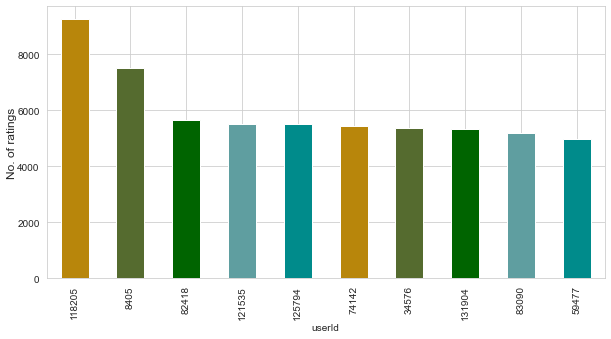

In [38]:
# Top 10 users who have rated most of the movies
ratings_user['rating']['size'].sort_values(ascending=False).head(10).plot(kind='bar', figsize = (10,5),color=['darkgoldenrod', 'darkolivegreen', 'darkgreen', 'cadetblue', 'darkcyan'])
plt.ylabel("No. of ratings", fontsize = 12, labelpad = 0)

In [39]:
#lowest rating of the movie
mean_rating = rating.groupby('movieId')[['rating']].mean()

lowest_rated = mean_rating['rating'].idxmin()
movie.loc[movie['movieId'] == lowest_rated]

#Beotted is the worst movie according to users

,movieId,title,genres
5706,5805,Besotted (2001),Drama


In [40]:
#Highest rating of the movie
highest_rated = mean_rating['rating'].idxmax()
movie.loc[movie['movieId'] == highest_rated]

#Life On a String is the highest rating of the movie


,movieId,title,genres
9007,26718,Life On A String (Bian chang Bian Zou) (1991),Adventure|Drama|Fantasy|Musical


In [41]:
# A better approach to evaluate the movie popularity is the bayesian average.
movie_stats = rating.groupby('movieId')[['rating']].agg(['count', 'mean'])
movie_stats.columns = movie_stats.columns.droplevel()

C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return bayesian_avg

bayesian_avg_ratings = rating.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')


movie_stats = movie_stats.merge(movie[['movieId', 'title']])
movie_stats.sort_values('bayesian_avg', ascending=False).head()


#As we can clearly see, by using bayesian average we were able to find the top movies which had the highest rating and
# is very popular among the users. Shawshank Redemption tops the list!!

,movieId,count,mean,bayesian_avg,title
315,318,63366,4.446990,4.431666,"Shawshank Redemption, The (1994)"
843,858,41355,4.364732,4.342857,"Godfather, The (1972)"
49,50,47006,4.334372,4.315561,"Usual Suspects, The (1995)"
523,527,50054,4.310175,4.292849,Schindler's List (1993)
1195,1221,27398,4.275641,4.245286,"Godfather: Part II, The (1974)"


In [42]:
movie_stats.sort_values('bayesian_avg', ascending=True).head()
#Similiarly just by viewing table in ascending order we can see that Battlefield Earth is the worst movie according to users.

,movieId,count,mean,bayesian_avg,title
3502,3593,3973,1.600554,1.843344,Battlefield Earth (2000)
1506,1556,5326,1.912317,2.062638,Speed 2: Cruise Control (1997)
1694,1760,2658,1.770316,2.069573,Spice World (1997)
1648,1707,2697,1.819985,2.105071,Home Alone 3 (1997)
2298,2383,2155,1.794896,2.139675,Police Academy 6: City Under Siege (1989)


In [43]:
# The sum of ratings for each movie
total_ratings=movie_details.groupby(['movieId','genres']).sum()['rating'].reset_index()

In [44]:
#copy of movie_details has made for the further implementation
df=movie_details.copy()

In [45]:
#duplicates are dropped to avoid redundency
df.drop_duplicates(['title','genres'],inplace=True) 

In [46]:
df=df.merge(total_ratings,on='movieId')
df.head()

,movieId,title,genres_x,userId,rating_x,genres_y,rating_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,Adventure|Animation|Children|Comedy|Fantasy,194866.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,3.5,Adventure|Children|Fantasy,71444.0
2,3,Grumpier Old Men (1995),Comedy|Romance,2,4.0,Comedy|Romance,40128.5
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,41,2.0,Comedy|Drama|Romance,7886.0
4,5,Father of the Bride Part II (1995),Comedy,12,2.0,Comedy,37268.5


In [47]:
df.drop(columns=['userId','rating_x','genres_y'],inplace=True)

In [48]:
df.rename(columns={'genres_x':'genres','rating_y':'rating'},inplace=True)
df.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,194866.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,71444.0
2,3,Grumpier Old Men (1995),Comedy|Romance,40128.5
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7886.0
4,5,Father of the Bride Part II (1995),Comedy,37268.5


In [49]:
df['rating']=df['rating'].astype(int)
df.dtypes

movieId     int64
title      object
genres     object
rating      int32
dtype: object

In [50]:
df = df[df['rating']>100]
df.shape

(11731, 4)

In [51]:
#counting the number of times the genres set occur:
df['genres'].value_counts()

Drama                              1671
Comedy                             1012
Comedy|Drama                        564
Drama|Romance                       493
Documentary                         425
                                   ... 
Action|Thriller|Western               1
Film-Noir|Horror                      1
Comedy|Crime|Romance|Thriller         1
Adventure|Comedy|Horror|Romance       1
(no genres listed)                    1
Name: genres, Length: 990, dtype: int64

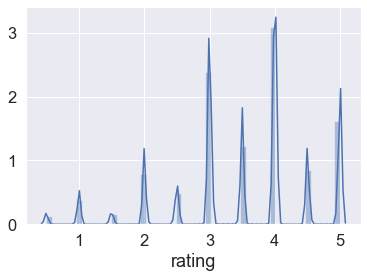

In [52]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(rating['rating'].fillna(rating['rating'].median()))

#The ratings look quite generous. The mean rating is 3.58 on a scale of 5. Half the movies have a rating of 4 and 5. 

In [53]:
# Content based filtering

In [54]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df["genres"])
tfidf_matrix.shape

(11731, 180)

In [55]:
tf.vocabulary_

{'adventure': 17,
 'animation': 34,
 'children': 48,
 'comedy': 61,
 'fantasy': 110,
 'adventure animation': 18,
 'animation children': 35,
 'children comedy': 49,
 'comedy fantasy': 65,
 'adventure children': 19,
 'children fantasy': 53,
 'romance': 163,
 'comedy romance': 70,
 'drama': 98,
 'comedy drama': 64,
 'drama romance': 105,
 'action': 0,
 'crime': 75,
 'thriller': 171,
 'action crime': 5,
 'crime thriller': 86,
 'action adventure': 1,
 'adventure thriller': 31,
 'horror': 130,
 'comedy horror': 66,
 'adventure romance': 29,
 'crime drama': 77,
 'action comedy': 4,
 'comedy crime': 62,
 'drama thriller': 107,
 'mystery': 149,
 'drama horror': 101,
 'horror mystery': 133,
 'mystery thriller': 153,
 'sci': 169,
 'fi': 121,
 'drama sci': 106,
 'sci fi': 170,
 'children drama': 52,
 'adventure drama': 23,
 'drama fantasy': 99,
 'fantasy mystery': 115,
 'mystery sci': 152,
 'fi thriller': 123,
 'imax': 139,
 'romance imax': 164,
 'documentary': 88,
 'documentary imax': 92,
 'war':

In [56]:
#for cosine similarity
from sklearn.metrics.pairwise import linear_kernel
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [57]:
cosine_similarity.shape

(11731, 11731)

In [58]:
titles = df["title"]

In [59]:
indices = pd.Series(df.index, index=df['title'])

In [60]:
indices.head()

title
Toy Story (1995)                      0
Jumanji (1995)                        1
Grumpier Old Men (1995)               2
Waiting to Exhale (1995)              3
Father of the Bride Part II (1995)    4
dtype: int64

In [61]:
#function for movie recommendation whic will use cosine silimarity algo to recommend movies based on user rating and other movies 
def movie_recommend(title):
    idx = indices[title]
    similar_scores = list(enumerate(cosine_similarity[idx]))
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
    similar_scores = similar_scores[1:21]
    movie_indices = [i[0] for i in similar_scores]
    return titles.iloc[movie_indices]

In [62]:
movie_recommend('Titanic (1997)').head(20)

17                                     Four Rooms (1995)
18                 Ace Ventura: When Nature Calls (1995)
64                                       Bio-Dome (1996)
68                                         Friday (1995)
87                                    Black Sheep (1996)
100                                     Mr. Wrong (1996)
102                                 Happy Gilmore (1996)
113    Happiness Is in the Field (Bonheur est dans le...
117                       Steal Big, Steal Little (1995)
123                        Flirting With Disaster (1996)
133                                Down Periscope (1996)
139                                 Birdcage, The (1996)
142                        Brothers McMullen, The (1995)
172                                     Jury Duty (1995)
174                            Living in Oblivion (1995)
185                                    Party Girl (1995)
201    To Wong Foo, Thanks for Everything! Julie Newm...
214                            

In [63]:
movie_recommend('Matrix, The (1999)').head(20)

6883                           Hercules in New York (1970)
21239                                      R.I.P.D. (2013)
23145                               Vampire Academy (2014)
4995                          The Man from Acapulco (1973)
1233                    Evil Dead II (Dead by Dawn) (1987)
7415                                         Versus (2000)
187                                        Reckless (1995)
592                 Window to Paris (Okno v Parizh) (1994)
1103                                 Drop Dead Fred (1991)
1250                             Young Frankenstein (1974)
1960                      Devil and Max Devlin, The (1981)
2090                                    Beetlejuice (1988)
2168                                           Toys (1992)
2537     William Shakespeare's A Midsummer Night's Drea...
3001                                         Harvey (1950)
3171                              Death Becomes Her (1992)
3377                                Heart and Souls (199

In [64]:
movie_details[movie_details["title"].str.contains("Drop Dead Fred")].head()

,movieId,title,genres,userId,rating
5913816,1126,Drop Dead Fred (1991),Comedy|Fantasy,16,3.0
5913817,1126,Drop Dead Fred (1991),Comedy|Fantasy,25,4.5
5913818,1126,Drop Dead Fred (1991),Comedy|Fantasy,69,3.0
5913819,1126,Drop Dead Fred (1991),Comedy|Fantasy,116,0.5
5913820,1126,Drop Dead Fred (1991),Comedy|Fantasy,156,3.0


In [65]:
movie_recommend("Drop Dead Fred (1991)")

25                                        Othello (1995)
30                                Dangerous Minds (1995)
39                       Cry, the Beloved Country (1995)
42                                    Restoration (1995)
54                                        Georgia (1995)
56                          Home for the Holidays (1995)
61                             Mr. Holland's Opus (1995)
66                                       Two Bits (1995)
89                    Journey of August King, The (1995)
112                             Margaret's Museum (1995)
119                      Boys of St. Vincent, The (1992)
122       Star Maker, The (Uomo delle stelle, L') (1995)
125    Silences of the Palace, The (Saimt el Qusur) (...
128                                        Angela (1995)
136                               Neon Bible, The (1995)
140                              Shadows (Cienie) (1988)
145                       Basketball Diaries, The (1995)
146                     Awfully

In [66]:
movie_recommend('Feast of July (1995)')

74                                      Big Bully (1996)
81                       Antonia's Line (Antonia) (1995)
83                    Last Summer in the Hamptons (1995)
94                         In the Bleak Midwinter (1995)
104           Nobody Loves Me (Keiner liebt mich) (1994)
154                              Blue in the Face (1995)
169                                       Jeffrey (1995)
176                          Love & Human Remains (1993)
192                                         Smoke (1995)
203                               Unstrung Heroes (1995)
216                              Boys on the Side (1995)
232                                       Ed Wood (1994)
269                   Madness of King George, The (1994)
301                                     Roommates (1995)
305      Three Colors: White (Trzy kolory: Bialy) (1994)
319                          Swimming with Sharks (1995)
320                                Sum of Us, The (1994)
341    Adventures of Priscilla,

In [74]:
start = default_timer()
plt.style.use('ggplot')

In [75]:
st = default_timer()

# First time data load.
movie=pd.read_csv('C:/Users/anjal/Desktop/Validation/Project Python/movie.csv')
ratings=pd.read_csv('C:/Users/anjal/Desktop/Validation/Project Python/rating.csv')
    
# Organise a bit and store into feather-format
movie.sort_values(by='movieId', inplace=True)
movie.reset_index(inplace=True, drop=True)
ratings.sort_values(by='movieId', inplace=True)
ratings.reset_index(inplace=True, drop=True)

print(ratings.dtypes)

# Split title and release year in separate columns in movie dataframe. Convert year to timestamp.
movie['year'] = movie.title.str.extract("\((\d{4})\)", expand=True)
movie.year = pd.to_datetime(movie.year, format='%Y')
movie.year = movie.year.dt.year # As there are some NaN years, resulting type will be float (decimals)
movie.title = movie.title.str[:-7]

# Categorize movie genres properly. Working later with +20MM rows of strings proved very resource consuming
genres_unique = pd.DataFrame(movie.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre']) # Format into DataFrame to store later
movie = movie.join(movie.genres.str.get_dummies().astype(bool))
movie.drop('genres', inplace=True, axis=1)

# Modify rating timestamp format (from seconds to datetime year)
#ratings.timestamp = pd.to_datetime(ratings.timestamp, unit='s')
ratings.timestamp = pd.to_datetime(ratings.timestamp, infer_datetime_format=True)
ratings.timestamp = ratings.timestamp.dt.year

# Check and clean NaN values
print ("Number of movie Null values: ", max(movie.isnull().sum()))
print ("Number of ratings Null values: ", max(ratings.isnull().sum()))
movie.dropna(inplace=True)
ratings.dropna(inplace=True)
    
# Organise a bit, then save into feather-formatand clear from memory
movie.sort_values(by='movieId', inplace=True)
ratings.sort_values(by='movieId', inplace=True)
movie.reset_index(inplace=True, drop=True)
ratings.reset_index(inplace=True, drop=True)
    
runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

userId         int64
movieId        int64
rating       float64
timestamp     object
dtype: object
Number of movie Null values:  22
Number of ratings Null values:  0
Elapsed time(sec):  60.36


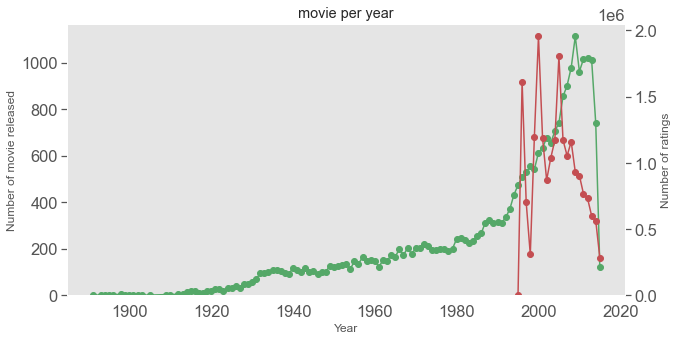

Elapsed time(sec):  1.48


In [76]:
st = default_timer()

# Let's work with a temp smaller slice 'dftmp' of the original dataframe to reduce runtime (ratings hass +2MM rows)
dftmp = movie[['movieId', 'year']].groupby('year')

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(dftmp.year.first(), dftmp.movieId.nunique(), "g-o")
ax1.grid(None)
ax1.set_ylim(0,)

dftmp = ratings[['rating', 'timestamp']].groupby('timestamp')
ax2 = ax1.twinx()
ax2.plot(dftmp.timestamp.first(), dftmp.rating.count(), "r-o")
ax2.grid(None)
ax2.set_ylim(0,)

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movie released'); ax2.set_ylabel('Number of ratings')
plt.title('movie per year')
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^ax1$|^ax2$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

<Figure size 720x360 with 0 Axes>

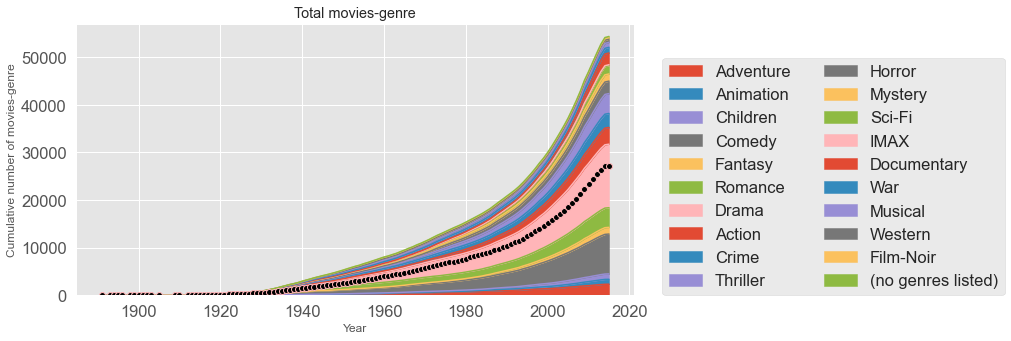

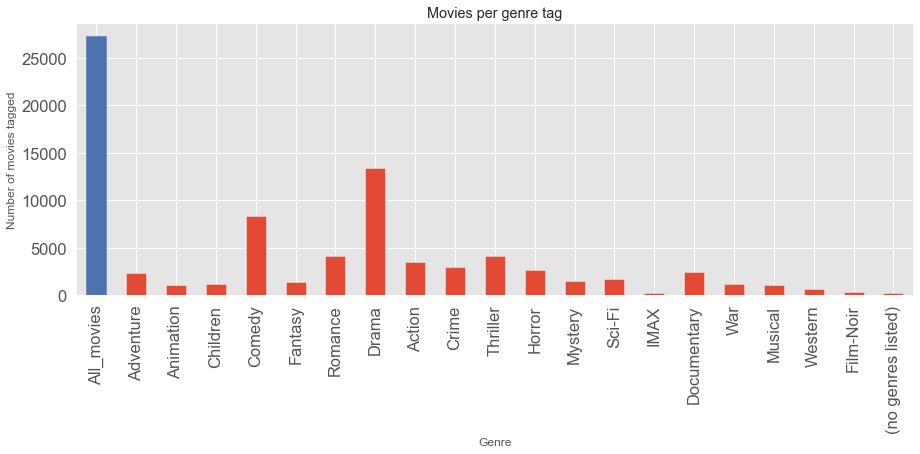

Elapsed time(sec):  0.89


In [77]:
st = default_timer()

plt.figure(figsize=(10,5))
dftmp = movie[['movieId', 'year']].groupby('year')
df = pd.DataFrame({'All_movies' : dftmp.movieId.nunique().cumsum()})
# Plot histogram for each individual genre
for genre in genres_unique.genre:
    dftmp = movie[movie[genre]][['movieId', 'year']].groupby('year')
    df[genre]=dftmp.movieId.nunique().cumsum()
df.fillna(method='ffill', inplace=True)
df.loc[:,df.columns!='All_movies'].plot.area(stacked=True, figsize=(10,5))
# Plot histogram for all movies
plt.plot(df['All_movies'], marker='o', markerfacecolor='black')
plt.xlabel('Year')
plt.ylabel('Cumulative number of movies-genre')
plt.title('Total movies-genre') # Many movies have multiple genres, so counthere is higher than number of movies
plt.legend(loc=(1.05,0), ncol=2)
plt.show()
# Plot simple scatter of the number of movies tagged with each genre
plt.figure(figsize=(15,5))
barlist = df.iloc[-1].plot.bar()
barlist.patches[0].set_color('b') # Color 'All_movies' differently, as it's not a genre tag count
plt.xticks(rotation='vertical')
plt.title('Movies per genre tag')
plt.xlabel('Genre')
plt.ylabel('Number of movies tagged')
plt.show()

# Housekeeping
%reset_selective -f (^barlist$|^dftmp$|^genre$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

In [79]:
# Reading ratings file
ratings = pd.read_csv('C:/Users/anjal/Desktop/Validation/Project Python/rating.csv', sep=',', encoding='latin-1', usecols=['userId','movieId','rating','timestamp'])

# Reading movies file

movies = pd.read_csv('C:/Users/anjal/Desktop/Validation/Project Python/movie.csv', sep=',', encoding='latin-1', usecols=['movieId','title','genres'])

In [80]:
df_movies = movies 
df_ratings = ratings
df_movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [81]:
tfidf_movies_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')

#Replace NaN with an empty string
df_movies['genres'] = df_movies['genres'].replace(to_replace="(no genres listed)", value="")

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_movies_genres_matrix = tfidf_movies_genres.fit_transform(df_movies['genres'])

cosine_sim_movies = linear_kernel(tfidf_movies_genres_matrix, tfidf_movies_genres_matrix)


In [82]:
#  To calculate the top 2 movies to recommend based on given movie titles genres.
def get_recommendations_based_on_genres(movie_title, cosine_sim_movies=cosine_sim_movies):

    # Get the index of the movie that matches the title
    idx_movie = df_movies.loc[df_movies['title'].isin([movie_title])]
    idx_movie = idx_movie.index
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
    
    # Sort the movies based on the similarity scores
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores_movies = sim_scores_movies[1:3]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores_movies]
    
    # Return the top 2 most similar movies
    return df_movies['title'].iloc[movie_indices]

In [83]:
get_recommendations_based_on_genres("Toy Story (1995)")

2209           Antz (1998)
3027    Toy Story 2 (1999)
Name: title, dtype: object

In [84]:
#  To calculate the top movies to be recommended to user based on movie user has watched.  
def get_recommendation_content_model(userId):
    recommended_movie_list = []
    movie_list = []
    df_rating_filtered = df_ratings[df_ratings["userId"]== userId]
    for key, row in df_rating_filtered.iterrows():
        movie_list.append((df_movies["title"][row["movieId"]==df_movies["movieId"]]).values) 
    for index, movie in enumerate(movie_list):
        for key, movie_recommended in get_recommendations_based_on_genres(movie[0]).iteritems():
            recommended_movie_list.append(movie_recommended)

    # removing already watched movie from recommended list    
    for movie_title in recommended_movie_list:
        if movie_title in movie_list:
            recommended_movie_list.remove(movie_title)
    
    return set(recommended_movie_list)
get_recommendation_content_model(1)

{'*batteries not included (1987)',
 '20,000 Leagues Under the Sea (1954)',
 '52 Pick-Up (1986)',
 'Ace Ventura: When Nature Calls (1995)',
 'Advantageous (2015)',
 'Adventures of Captain Marvel (1941)',
 'Agent Cody Banks (2003)',
 'Alice in Wonderland (2010)',
 'Alien: Resurrection (1997)',
 'AlienÂ³ (a.k.a. Alien 3) (1992)',
 'Amityville Horror, The (1979)',
 "Antonia's Line (Antonia) (1995)",
 'Aragami (2003)',
 'Assassins (1995)',
 'Asterix and Cleopatra (AstÃ©rix et ClÃ©opÃ¢tre) (1968)',
 'Asterix and the Gauls (AstÃ©rix le Gaulois) (1967)',
 'Back to the Future (1985)',
 'Bad Company (1995)',
 'Bad Girls (1994)',
 'Barb Wire (1996)',
 'Batman Forever (1995)',
 'Battlestar Galactica (2003)',
 'Beast, The (La bÃªte) (1975)',
 'Before the Rain (Pred dozhdot) (1994)',
 'Beowulf & Grendel (2005)',
 'Beyond Bedlam (1993)',
 'Big Bully (1996)',
 'Big Green, The (1995)',
 'Big Trouble in Little China (1986)',
 'Biggles (1986)',
 'Billy the Kid vs. Dracula (1966)',
 'Bite the Bullet (1975

In [85]:
# Model evaluation with KNN,the model is evaluated on based of if there is exact match of genres with the genres of movie which is already watch by user

In [86]:
from sklearn.neighbors import KNeighborsClassifier  
def get_movie_label(movie_id):
 
    classifier = KNeighborsClassifier(n_neighbors=5)
    x= tfidf_movies_genres_matrix
    y = df_movies.iloc[:,-1]
    classifier.fit(x, y)
    y_pred = classifier.predict(tfidf_movies_genres_matrix[movie_id])
    return y_pred

In [87]:
get_movie_label(1)

array(['Adventure|Children|Fantasy'], dtype=object)

In [88]:
ratings[ratings['userId'] == 150]

,userId,movieId,rating,timestamp
19209,150,107,3.0,2010-12-30 12:48:17
19210,150,223,2.5,2010-12-30 12:55:16
19211,150,455,1.5,2010-12-30 12:47:41
19212,150,719,1.5,2010-12-30 12:47:44
19213,150,1015,3.5,2010-12-30 12:50:32
19214,150,1030,3.0,2010-12-30 12:50:55
19215,150,1033,4.0,2010-12-30 12:50:06
19216,150,1298,4.0,2010-12-30 12:48:43
19217,150,1381,1.5,2010-12-30 12:50:09
19218,150,1586,4.0,2010-12-30 12:48:20


In [89]:
# Collabarative Based Filtering

In [90]:
# We are gonna use the collabortive filtering method to generate the users.

def create_X(df):
   
    N = df['userId'].nunique()
    M = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(N))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(M))))
    
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(M)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    movie_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (movie_index, user_index)), shape=(M, N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

In [91]:
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(rating)

In [92]:
sparsity = X.count_nonzero()/(X.shape[0]*X.shape[1])

print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.54%


In [93]:
#This approach looks for the k-nearest neighbours of a given movie by identifying k points in the dataset that are closest to movie m. 

from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, k, metric='cosine', show_distance=False):
  
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(movie_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [94]:
#find_similar_movies() takes in a movieId and user-item X matrix, and outputs a list of k movies that are similar to the movieId of interest.

movie_titles = dict(zip(movie['movieId'], movie['title']))

movie_id = 1

similar_ids = find_similar_movies(movie_id, X, k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}")
for i in similar_ids:
    print(movie_titles[i])

Because you watched Toy Story
Star Wars: Episode IV - A New Hope
Independence Day (a.k.a. ID4)
Star Wars: Episode VI - Return of the Jedi
Toy Story 2
Back to the Future
Forrest Gump
Aladdin
Mission: Impossible
Jurassic Park
Willy Wonka & the Chocolate Factory


In [95]:
#The results above show the 10 most similar movies to Toy Story. The movies in this list are family movies. These recommendations are based on user-item ratings and genre is not taken into consideration..
# Now we changed the kNN distance metric to "euclidean" instead of "cosine".

movie_titles = dict(zip(movie['movieId'], movie['title']))
movie_id = 1
similar_ids = find_similar_movies(movie_id, X, k=10, metric="euclidean")
movie_title = movie_titles[movie_id]
print(f"Because you watched {movie_title}:")
for i in similar_ids:
    print(movie_titles[i])

Because you watched Toy Story:
Toy Story 2
Willy Wonka & the Chocolate Factory
Independence Day (a.k.a. ID4)
Mission: Impossible
Twister
Bug's Life, A
Men in Black (a.k.a. MIB)
Monsters, Inc.
Groundhog Day
Aladdin


In [96]:
#The results above show the 10 most similar movies to Toy Story. The movies in this list are family movies. These recommendations are based on user-item ratings and genre is not taken into consideration.
# Now we changed the kNN distance metric to  "manhattan" instead of "euclidean".

movie_titles = dict(zip(movie['movieId'], movie['title']))
movie_id = 1
similar_ids = find_similar_movies(movie_id, X, k=10, metric="manhattan")
movie_title = movie_titles[movie_id]
print(f"Because you watched {movie_title}:")
for i in similar_ids:
    print(movie_titles[i])

Because you watched Toy Story:
Toy Story 2
Willy Wonka & the Chocolate Factory
Bug's Life, A
Monsters, Inc.
Mission: Impossible
Finding Nemo
Independence Day (a.k.a. ID4)
Twister
Men in Black (a.k.a. MIB)
Groundhog Day


In [16]:
# Collabaration - Filtering  - Model Based - SVD

In [97]:
rating_df = rating.loc[:,["userId","movieId","rating"]]
movie = movie.loc[:,["movieId","title"]]
data = pd.merge(movie,rating_df)

In [98]:
data.head(10)

,movieId,title,userId,rating
0,1,Toy Story,3,4.0
1,1,Toy Story,6,5.0
2,1,Toy Story,8,4.0
3,1,Toy Story,10,4.0
4,1,Toy Story,11,4.5
5,1,Toy Story,12,4.0
6,1,Toy Story,13,4.0
7,1,Toy Story,14,4.5
8,1,Toy Story,16,3.0
9,1,Toy Story,19,5.0


In [99]:
data.shape

(19999858, 4)

In [100]:
data = data.iloc[:1000000,:]

In [101]:
Ratings = data.pivot_table(index = ["userId"],columns = ["movieId"],values = "rating").fillna(0)
Ratings.head(10)

movieId,1,2,3,4,5,6,7,8,9,10,...,138,139,140,141,142,143,144,145,146,147
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
R = Ratings.to_numpy()
#print(R)
user_ratings_mean = np.mean(R, axis = 1)
#print(user_ratings_mean.shape)
print(user_ratings_mean.size)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1) ## Making the user_ratings_mean vertical by reshaping

123161


In [105]:
U, S, Vt = svds(Ratings_demeaned, k = 50)
print('Size of sigma: ' , S.size)

Size of sigma:  50


In [106]:
S = np.diag(S)
print('Shape of sigma: ', S.shape)
print(S)

Shape of sigma:  (50, 50)
[[ 210.52435616    0.            0.         ...    0.
     0.            0.        ]
 [   0.          212.78362865    0.         ...    0.
     0.            0.        ]
 [   0.            0.          219.77006173 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  747.9550084
     0.            0.        ]
 [   0.            0.            0.         ...    0.
   845.52746991    0.        ]
 [   0.            0.            0.         ...    0.
     0.         1791.36600441]]


In [107]:
print('Shape of U: ', U.shape)
print('Shape of Vt: ', Vt.shape)

Shape of U:  (123161, 50)
Shape of Vt:  (50, 146)


In [109]:
userPredictedRating = np.dot(np.dot(U, S), Vt) + user_ratings_mean.reshape(-1, 1)

In [110]:
print('All user predicted rating : ', userPredictedRating.shape)
print('Rating Dataframe column names',Ratings.columns)

All user predicted rating :  (123161, 146)
Rating Dataframe column names Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            138, 139, 140, 141, 142, 143, 144, 145, 146, 147],
           dtype='int64', name='movieId', length=146)


In [111]:
preds = pd.DataFrame(userPredictedRating, columns = Ratings.columns)
preds

movieId,1,2,3,4,5,6,7,8,9,10,...,138,139,140,141,142,143,144,145,146,147
0,-0.001231,3.491031,0.004119,-0.021319,0.002159,-0.001583,-0.001097,0.017548,0.140513,0.000352,...,-0.021799,-0.024844,0.018223,0.006934,-0.022618,-0.025432,0.032898,0.001545,-0.021599,0.057499
1,-0.000410,-0.004306,3.985293,-0.020084,0.005292,0.003588,-0.016375,0.004744,-0.152371,-0.000202,...,-0.010807,-0.004855,0.129283,-0.001425,-0.010524,-0.001642,0.088505,0.018332,-0.015168,0.035437
2,4.003844,-0.008651,0.000128,0.066469,0.010113,0.004215,-0.006589,0.038616,-0.023569,-0.001772,...,-0.019207,-0.012487,-0.061583,0.006585,-0.011547,-0.014299,-0.074193,-0.016331,-0.017095,0.052643
3,0.000691,0.004249,0.001236,-0.030847,0.007573,2.992991,0.001582,-0.013070,-0.019681,3.996198,...,0.005268,0.000732,0.013994,-0.001028,0.001331,0.002332,0.002617,-0.013164,0.002362,-0.026890
4,0.010890,2.986110,-0.010456,0.247240,0.039044,-0.014154,0.009943,0.219000,-0.048828,0.002810,...,-0.040286,-0.039477,0.864902,5.009438,-0.038529,-0.037149,-0.181025,-0.023144,0.090252,-0.047362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123156,-0.000715,-0.001825,-0.002450,-0.008794,0.003877,-0.000506,-0.007191,-0.007931,-0.034216,-0.000468,...,-0.018158,-0.016192,0.022402,0.002289,-0.015404,-0.015892,0.067446,-0.002003,-0.013442,0.029291
123157,0.009777,-0.007234,0.131863,-0.080461,-0.010756,-0.010551,0.071721,-0.005173,-0.248861,0.005821,...,0.118074,0.095825,-0.236187,-0.033105,0.092049,0.092601,-0.152606,0.119905,0.066514,-0.053574
123158,1.999255,0.000288,0.000712,-0.006342,0.000215,-0.000181,0.000681,-0.004943,0.001723,0.000253,...,0.000378,0.000781,0.003185,0.000047,0.000516,0.000650,0.003751,0.001165,-0.000702,-0.002196
123159,0.012919,0.017959,-0.047058,0.229335,-0.058884,0.015062,0.002056,0.019003,-0.099170,0.008017,...,-0.032644,-0.014599,0.234238,0.001072,-0.014819,-0.018145,-0.142574,-0.048879,-0.024551,0.497938


In [112]:
#  Implementation of SVD
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):

    # Sorting the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = predictions.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Merging user's data and  movie information.
    user_data = original_ratings[original_ratings.userId == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings for movies not rated yet.'.format(num_recommendations))
    
    # Recommend the highest predicted rating for movies that the user hasn't seen yet.
    recommendations = (movie[~movie['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [114]:
prevRated, predictions = recommend_movies(preds, 140, movie, rating, 20)

User 140 has already rated 255 movies.
Recommending highest 20 predicted ratings for movies not rated yet.


In [116]:
print('The previously rated movies:\n')
prevRated.head(20)

The previously rated movies:



,userId,movieId,rating,timestamp,title
127,140,1079,5.0,1997-10-27 22:39:44,"Fish Called Wanda, A"
157,140,1225,5.0,1997-10-27 23:25:41,Amadeus
190,140,1440,5.0,1998-12-20 18:30:26,Amos & Andrew
155,140,1216,5.0,1997-10-27 23:23:03,"Big Blue, The (Grand bleu, Le)"
194,140,1475,5.0,1997-10-27 20:32:16,Kama Sutra: A Tale of Love
100,140,800,5.0,1997-10-27 20:21:07,Lone Star
201,140,1527,5.0,1997-10-27 20:09:47,"Fifth Element, The"
150,140,1199,5.0,1997-10-27 22:39:44,Brazil
51,140,380,5.0,1997-10-27 23:35:00,True Lies
212,140,1610,5.0,1997-10-27 23:46:49,"Hunt for Red October, The"


In [117]:
 # Top 20 movies that User  hopefully will enjoy
predictions

,movieId,title
20,29,"City of Lost Children, The (Cité des enfants p..."
34,44,Mortal Kombat
102,123,Chungking Express (Chung Hing sam lam)
78,97,"Hate (Haine, La)"
65,82,Antonia's Line (Antonia)
10,15,Cutthroat Island
15,23,Assassins
68,85,Angels and Insects
52,66,Lawnmower Man 2: Beyond Cyberspace
21,30,Shanghai Triad (Yao a yao yao dao waipo qiao)


In [2]:
from surprise.model_selection import GridSearchCV, KFold, train_test_split
ratings=pd.read_csv('C:/Users/anjal/Desktop/Validation/Project Python/rating.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [3]:
movies = pd.read_csv(r'C:\Users\anjal\Desktop\Validation\Project Python\movie.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [6]:
from surprise import accuracy
start = time.time()

kf = KFold(n_splits=5)

algo = SVD(verbose=True)

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
    
print("Runtime %0.2f" % (time.time() - start))

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.7857
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.7853
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Proc

In [7]:
rmses = [0.7857,0.7853,0.7863,0.7862,0.7859]
rmse_avg = round(sum(rmses) / len(rmses),5)
print('The mean RMSE of the full rating set is: {}'.format(rmse_avg))

The mean RMSE of the full rating set is: 0.78588


In [8]:
 algo.predict(255,2004)

Prediction(uid=255, iid=2004, r_ui=None, est=3.1192924370149555, details={'was_impossible': False})

In [9]:
ratings[ratings['userId'] == 255]

,userId,movieId,rating,timestamp
32752,255,2,5.0,2000-02-23 09:36:35
32753,255,34,5.0,2000-02-23 10:18:17
32754,255,87,4.0,2000-02-23 09:35:23
32755,255,105,3.0,2000-02-23 09:46:38
32756,255,207,5.0,2000-02-23 09:43:06
32757,255,316,2.0,2000-02-27 11:48:58
32758,255,339,5.0,2000-02-23 09:51:51
32759,255,364,5.0,2000-02-23 10:18:17
32760,255,377,4.0,2000-02-23 09:46:38
32761,255,380,5.0,2000-02-23 09:48:46


In [10]:
ratings[ratings['movieId'] == 2004].head(1)

,userId,movieId,rating,timestamp
1084,11,2004,4.5,2009-01-02 00:25:10


In [11]:
algo.predict(240, 1864)

Prediction(uid=240, iid=1864, r_ui=None, est=2.559060320406741, details={'was_impossible': False})

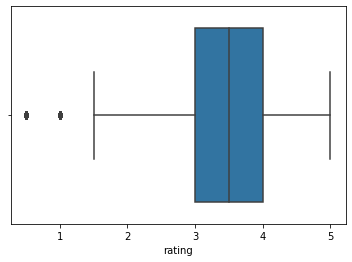

In [12]:
sns.boxplot(ratings['rating'])

In [13]:
# Hybrid filtering - Combining content based and Collabaration - SVD model

In [14]:
# Content Based
df_movies = movies 
df_ratings = ratings
df_movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
tfidf_movies_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')

df_movies['genres'] = df_movies['genres'].replace(to_replace="(no genres listed)", value="")

tfidf_movies_genres_matrix = tfidf_movies_genres.fit_transform(df_movies['genres'])
cosine_sim_movies = linear_kernel(tfidf_movies_genres_matrix, tfidf_movies_genres_matrix)


In [22]:
def get_recommendations_based_on_genres(movie_title, cosine_sim_movies=cosine_sim_movies):
  
    # Get the index of the movie that matches the title
    idx_movie = df_movies.loc[df_movies['title'].isin([movie_title])]
    idx_movie = idx_movie.index
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
    
    # Sort the movies based on the similarity scores
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores_movies = sim_scores_movies[1:3]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores_movies]
    
    # Return the top 2 most similar movies
    return df_movies['title'].iloc[movie_indices]

In [17]:
def get_recommendation_content_model(userId):
    recommended_movie_list = []
    movie_list = []
    df_rating_filtered = df_ratings[df_ratings["userId"]== userId]
    for key, row in df_rating_filtered.iterrows():
        movie_list.append((df_movies["title"][row["movieId"]==df_movies["movieId"]]).values) 
    for index, movie in enumerate(movie_list):
        for key, movie_recommended in get_recommendations_based_on_genres(movie[0]).iteritems():
            recommended_movie_list.append(movie_recommended)

    # removing already watched movie from recommended list    
    for movie_title in recommended_movie_list:
        if movie_title in movie_list:
            recommended_movie_list.remove(movie_title)
    
    return set(recommended_movie_list)
get_recommendation_content_model(1)

{'*batteries not included (1987)',
 '20,000 Leagues Under the Sea (1954)',
 '52 Pick-Up (1986)',
 'Ace Ventura: When Nature Calls (1995)',
 'Advantageous (2015)',
 'Adventures of Captain Marvel (1941)',
 'Agent Cody Banks (2003)',
 'Alice in Wonderland (2010)',
 'Alien: Resurrection (1997)',
 'Alien³ (a.k.a. Alien 3) (1992)',
 'Amityville Horror, The (1979)',
 "Antonia's Line (Antonia) (1995)",
 'Aragami (2003)',
 'Assassins (1995)',
 'Asterix and Cleopatra (Astérix et Cléopâtre) (1968)',
 'Asterix and the Gauls (Astérix le Gaulois) (1967)',
 'Back to the Future (1985)',
 'Bad Company (1995)',
 'Bad Girls (1994)',
 'Barb Wire (1996)',
 'Batman Forever (1995)',
 'Battlestar Galactica (2003)',
 'Beast, The (La bête) (1975)',
 'Before the Rain (Pred dozhdot) (1994)',
 'Beowulf & Grendel (2005)',
 'Beyond Bedlam (1993)',
 'Big Bully (1996)',
 'Big Green, The (1995)',
 'Big Trouble in Little China (1986)',
 'Biggles (1986)',
 'Billy the Kid vs. Dracula (1966)',
 'Bite the Bullet (1975)',
 '

In [18]:
# Hybrid Filtering

In [19]:
userId=240

In [20]:
recommended_movies_by_content_model = get_recommendation_content_model(userId)
recommended_movies_by_content_model = df_movies[df_movies.apply(lambda movie: movie["title"] in recommended_movies_by_content_model, axis=1)]
for key, columns in recommended_movies_by_content_model.iterrows():
    predict = algo.predict(userId, columns["movieId"])
    recommended_movies_by_content_model.loc[key, "svd_rating"] = predict.est

recommended_movies_by_content_model.sort_values("svd_rating", ascending=False).iloc[0:11]
        

,movieId,title,genres,svd_rating
27,28,Persuasion (1995),Drama|Romance,4.222333
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.203450
7357,7505,"Kingdom, The (Riget) (1994)",Drama|Horror|Mystery,4.121547
10364,36363,Kin-Dza-Dza! (1986),Comedy|Drama|Sci-Fi,3.955559
928,945,Top Hat (1935),Comedy|Musical|Romance,3.892859
212,214,Before the Rain (Pred dozhdot) (1994),Drama|War,3.839332
886,903,Vertigo (1958),Drama|Mystery|Romance|Thriller,3.832710
1763,1845,Zero Effect (1998),Comedy|Mystery|Thriller,3.754547
147,149,Amateur (1994),Crime|Drama|Thriller,3.748887
25,26,Othello (1995),Drama,3.737219
